In [133]:
import pandas as pd 
import matplotlib.pyplot as plt 
from scipy.stats import ttest_ind


In [2]:
import nltk
from nltk.corpus import wordnet as wn

In [17]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /home/prince/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/prince/nltk_data...


True

In [36]:
import requests
from bs4 import BeautifulSoup

url = "https://www.fluentin3months.com/french-cognates/"
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')


In [37]:
list_div = soup.find('div', {'class': 'entry-content'})
list_items = list_div.find_all('li')


In [41]:
french_cognates = []
for item in list_items:
    strong_tag = item.find('strong')
    if strong_tag:
        french_cognates.append(strong_tag.text)


In [44]:
french_cognates

['l’accélération',
 'action',
 'addiction',
 'ambition',
 'attention',
 'celebration',
 'champion',
 'communication',
 'condition',
 'conversation',
 'donation',
 'diction',
 'édition',
 'election',
 'equation',
 'emotion',
 'érosion',
 'fiction',
 'function',
 'génération',
 'infection',
 'l’information',
 'injection',
 'invasion',
 'legion',
 'motion',
 'notion',
 'nation',
 'omission',
 'option',
 'passion',
 'population',
 'présentation',
 'prononciation',
 'question',
 'ration',
 'reflection',
 'religion',
 'réservation',
 'région',
 'rotation',
 'session',
 'station',
 'solution',
 'transaction',
 'animal',
 'central',
 'national',
 'final',
 'international',
 'mental',
 'vertical',
 'adorable',
 'admirable',
 'applicable',
 'cable',
 'capable',
 'double',
 'durable',
 'favorable',
 'habitable',
 'incurable',
 'identifiable',
 'improbable',
 'inséparable',
 'justifiable',
 'notable',
 'recyclable',
 'respectable',
 'sociable',
 'table',
 'vulnérable',
 'horrible',
 'flexible',
 '

In [50]:
weights = pd.read_csv("./results/hlr.settles.acl16.learning_traces.13m.weights",delimiter='\t',skiprows=3,header=None)

In [60]:
weights.columns = ['lexemes','weights']

In [62]:
weights.head()

,lexemes,weights
0,es:desde/desde<pr>,0.1707
1,es:como/comer<vblex><pri><p1><sg>,0.1708
2,de:kinder/kind<n><nt><pl><nom>,0.1297
3,en:strawberry/strawberry<n><sg>,-0.0585
4,en:to/to<pr>,0.0324


In [64]:


# Function to split the column into four parts
def split_column(row):
    parts = row['lexemes'].split(':')
    row['lang'] = parts[0] 
    parts = parts[1].split('/')
    row['surface_form'] = parts[0]
    parts = parts[1].split('<')
    row['root'] = parts[0]
    row['tags'] = parts[1:]
    return row   

# Apply the function to the dataframe and drop the original column
df = weights.apply(split_column, axis=1).drop('lexemes', axis=1)




       weights lang surface_form        root                            tags
0       0.1707   es        desde       desde                           [pr>]
1       0.1708   es         como       comer        [vblex>, pri>, p1>, sg>]
2       0.1297   de       kinder        kind            [n>, nt>, pl>, nom>]
3      -0.0585   en   strawberry  strawberry                       [n>, sg>]
4       0.0324   en           to          to                           [pr>]
...        ...  ...          ...         ...                             ...
19274   0.0000   fr   conférence  conférence                   [n>, f>, sg>]
19275   0.0000   fr        liens        lien                   [n>, m>, pl>]
19276   0.0000   pt          foi          ir        [vblex>, ifi>, p3>, sg>]
19277   0.0000   de        <*sf>      heißen  [vblex>, pri>, *pers>, *numb>]
19278   0.0000   fr    compagnie   compagnie                   [n>, f>, sg>]

[19279 rows x 5 columns]


In [90]:
def handle_sf(row):
    if row.surface_form == '<*sf>':
        row.surface_form = row.root
    return row

In [92]:
df = df.apply(handle_sf,axis=1)

In [65]:
df.head()

,weights,lang,surface_form,root,tags
0,0.1707,es,desde,desde,[pr>]
1,0.1708,es,como,comer,"[vblex>, pri>, p1>, sg>]"
2,0.1297,de,kinder,kind,"[n>, nt>, pl>, nom>]"
3,-0.0585,en,strawberry,strawberry,"[n>, sg>]"
4,0.0324,en,to,to,[pr>]


In [94]:
french_weights = df[df.lang == 'fr']

In [100]:
french_lexemes = set(french_weights.surface_form) 

In [101]:
french_cognates = french_lexemes & set(french_cognates)

In [102]:
len(french_cognates)

82

In [103]:
french_non_cognates = french_lexemes - set(french_cognates)

In [104]:
len(french_non_cognates)

2654

,weights,lang,surface_form,root,tags
0,0.1707,es,desde,desde,[pr>]
1,0.1708,es,como,comer,"[vblex>, pri>, p1>, sg>]"
4,0.0324,en,to,to,[pr>]
5,-0.0578,en,am,be,"[vbser>, pri>, p1>, sg>]"
6,0.1622,en,on,on,[pr>]
...,...,...,...,...,...
19257,0.0000,pt,banda,banda,"[n>, f>, sg>]"
19259,0.0000,de,feld,feld,"[n>, nt>, *numb>, *case>]"
19273,0.0000,pt,ajuda,ajudar,"[vblex>, pri>, p3>, sg>]"
19275,0.0000,fr,liens,lien,"[n>, m>, pl>]"


In [113]:
df[length >= 6]

,weights,lang,surface_form,root,tags
2,0.1297,de,kinder,kind,"[n>, nt>, pl>, nom>]"
3,-0.0585,en,strawberry,strawberry,"[n>, sg>]"
8,0.1148,en,elephants,elephant,"[n>, pl>]"
15,0.3490,en,thanks,thanks,[ij>]
20,0.2906,fr,poisson,poisson,"[n>, m>, sg>]"
...,...,...,...,...,...
19271,0.0000,it,pescare,pescare,"[vblex>, inf>]"
19272,0.0000,pt,conhecemos,conhecer,"[vblex>, pri>, p1>, pl>]"
19274,0.0000,fr,conférence,conférence,"[n>, f>, sg>]"
19277,0.0000,de,heißen,heißen,"[vblex>, pri>, *pers>, *numb>]"


count    357.000000
mean       0.053473
std        0.184395
min       -0.513200
25%       -0.062600
50%        0.058300
75%        0.172400
max        0.675100
Name: weights, dtype: float64
count    18922.000000
mean         0.135181
std          0.203168
min         -0.771300
25%          0.000000
50%          0.130000
75%          0.272600
max          0.772200
Name: weights, dtype: float64
count    1318.000000
mean        0.098002
std         0.200832
min        -0.513200
25%        -0.035125
50%         0.106100
75%         0.223425
max         0.675100
Name: weights, dtype: float64
count    17961.000000
mean         0.136285
std          0.203058
min         -0.771300
25%          0.000400
50%          0.130100
75%          0.274300
max          0.772200
Name: weights, dtype: float64
count    3672.000000
mean        0.129700
std         0.204832
min        -0.550700
25%        -0.000800
50%         0.130100
75%         0.269025
max         0.719800
Name: weights, dtype: float64
co

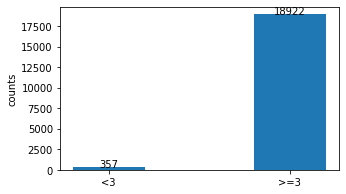

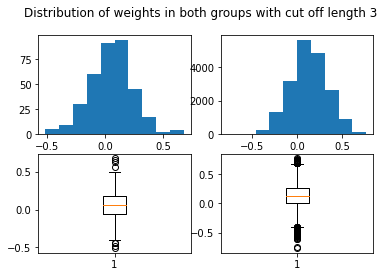

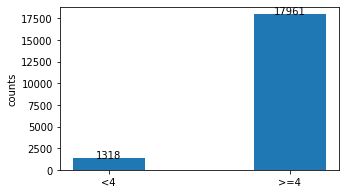

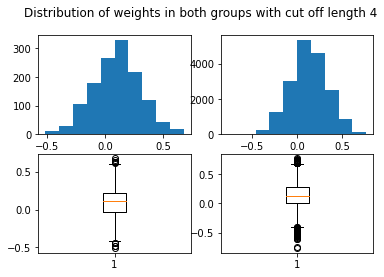

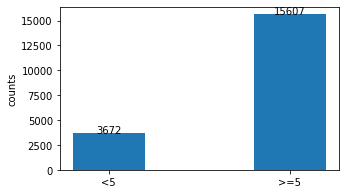

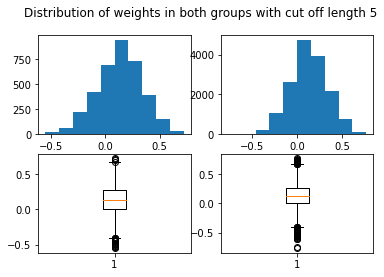

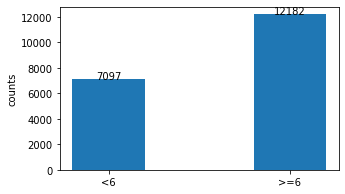

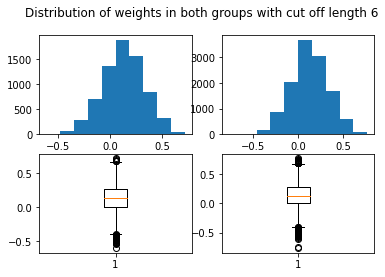

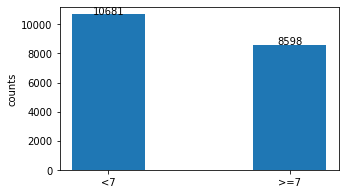

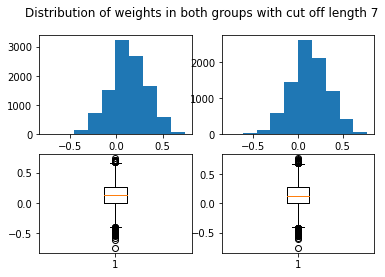

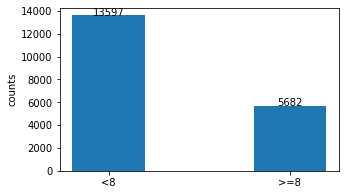

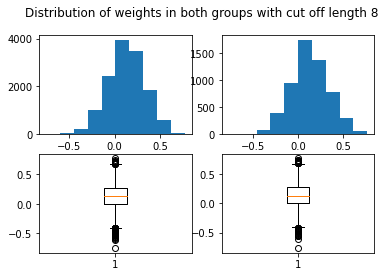

In [142]:
lengths = [3,4,5,6,7,8]
pvalues = []
temp = df['surface_form'].apply(lambda x : len(x))

for length in lengths:
    group1 = df[temp < length]
    group2 = df[temp >= length]

    values = [len(group1),len(group2)]
    labels = [f"<{length}",f">={length}"]
    plt.figure(figsize=(5,3))
    plt.bar(labels,values,width=0.4)
    for i in range(len(labels)):
        plt.text(i, values[i], values[i], ha = 'center')
    plt.ylabel("counts")

    fig,axes = plt.subplots(2,2)
    axes[0,0].hist(group1.weights)
    axes[0,1].hist(group2.weights)

    axes[1,0].boxplot(group1.weights)
    axes[1,1].boxplot(group2.weights)

    fig.suptitle(f"Distribution of weights in both groups with cut off length {length}")

    print(group1.weights.describe())
    print(group2.weights.describe())

    result = ttest_ind(group1.weights,group2.weights,equal_var=False)
    pvalues.append(result.pvalue)

Text(0, 0.5, 'p values')

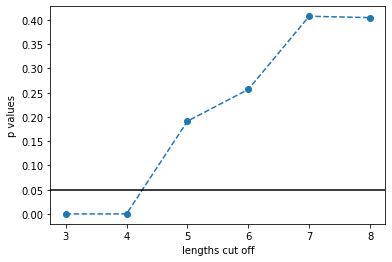

In [153]:
plt.plot(lengths,pvalues,linestyle='dashed',marker="o")
plt.axhline(0.05,color='black')
plt.xlabel("lengths cut off")
plt.ylabel("p values")

Text(0.5, 1.0, 'distribution of length of words')

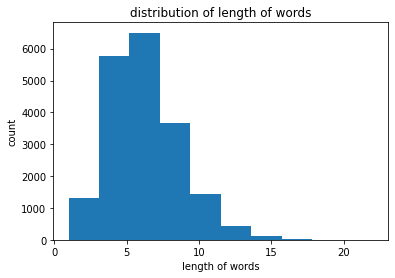

In [123]:
plt.hist(temp)
plt.xlabel("length of words")
plt.ylabel("count")
plt.title("distribution of length of words")

In [118]:
len(df)

19279